In [77]:
import regionmask
import matplotlib.pyplot as plt
import cartopy.crs as ccrs

import seaborn as sns

In [17]:
%matplotlib inline

In [58]:
proj = ccrs.LambertConformal(central_longitude=8.25)

In [250]:
CH = regionmask.defined_regions.natural_earth.countries_50 #[['D']]

#bounds = np.array(CH['CH'].polygon.bounds)

#bounds = np.round(bounds, 1)

delta = 0.5

lon = np.arange(4.5, 13.5 + delta, delta)
lat = np.arange(42, 49 + delta, delta)

mask = CH.mask(lon, lat)

In [251]:
uq = np.unique(mask)
uq = uq[~ np.isnan(uq)]

for i, d in enumerate(uq):
    mask.values[mask.values == d] = i

In [252]:
np.unique(mask)

array([  0.,   1.,   2.,   3.,   4.,   5.,   6.,  nan,  nan,  nan,  nan,
        nan,  nan,  nan,  nan,  nan,  nan,  nan,  nan,  nan,  nan,  nan,
        nan,  nan,  nan,  nan,  nan,  nan,  nan,  nan,  nan,  nan,  nan,
        nan,  nan,  nan,  nan,  nan,  nan,  nan,  nan,  nan,  nan,  nan,
        nan,  nan,  nan,  nan,  nan,  nan,  nan,  nan,  nan,  nan,  nan,
        nan,  nan,  nan,  nan,  nan,  nan,  nan,  nan,  nan,  nan,  nan,
        nan])

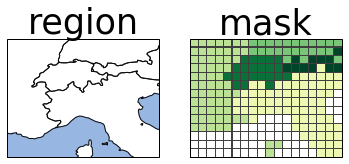

In [253]:
proj = ccrs.PlateCarree()

f, axes = plt.subplots(1, 2, subplot_kw=dict(projection=proj))

# AXIS 0
CH.plot(ax=axes[0], add_label=False, coastlines=False, resolution='50m')

# AXIS 1

mask.plot(ax=axes[1], add_colorbar=False, transform=ccrs.PlateCarree(), edgecolor='0.25', lw=0.05,
          cmap='YlGn_r')


bounds = [4.51, 13.49, 42.02, 48.99]
axes[0].set_extent(bounds, ccrs.PlateCarree())
axes[1].set_extent(bounds, ccrs.PlateCarree())

# despine
#sns.despine(f, bottom=True, left=True)
#axes[0].outline_patch.set_visible(False)
#axes[1].outline_patch.set_visible(False)

# title
axes[0].set_title('region', fontsize=35)
axes[1].set_title('mask',  fontsize=35)

plt.savefig('logo.png', dpi=300, bbox_inches='tight')

In [ ]:
axes[0].get_extent